In [4]:
import scipy.io
import pandas as pd
import numpy as np

#load the .mat Train Data file
mat = scipy.io.loadmat('Dataset/delta1/train_label_delta1.mat')

print(mat.keys())

label = mat['EXT']  #column name that contains data

#Save/convert to a csv file
train_labels = pd.DataFrame(label)
# display(labels)
train_labels[0].value_counts()
# train_labels.to_csv('train_data_delta1.csv', index=False)

mat = scipy.io.loadmat('Dataset/delta1/train_data_delta1.mat')

print(mat.keys())

data = mat['EXY']  #column name that contains data

#Save/convert to a csv file
train_data = pd.DataFrame(data)
# display(train_data)


dict_keys(['__header__', '__version__', '__globals__', 'EXT'])
dict_keys(['__header__', '__version__', '__globals__', 'EXY'])


In [5]:
#load the .mat Test Data file
mat = scipy.io.loadmat('Dataset/delta1/test_label_delta1.mat')

print(mat.keys())

label = mat['Ytest']  #column name that contains data

#Save/convert to a csv file
test_labels = pd.DataFrame(label)
# display(labels)
test_labels[0].value_counts()
# train_labels.to_csv('train_data_delta1.csv', index=False)

mat = scipy.io.loadmat('Dataset/delta1/test_data_delta1.mat')

print(mat.keys())

data = mat['X_test']  #column name that contains data

#Save/convert to a csv file
test_data = pd.DataFrame(data)
# display(train_data)
y_test = test_labels
X_test = test_data

dict_keys(['__header__', '__version__', '__globals__', 'Ytest'])
dict_keys(['__header__', '__version__', '__globals__', 'X_test'])


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
#split data
N = train_data[np.array(train_labels) == 0]
P = train_data[np.array(train_labels) == 1]

N = N.reset_index(drop=True)
P = P.reset_index(drop=True)

N_train_i = N
P_size = P.shape[0]
N_size = N.shape[0]
print(P.shape)
if(P_size % N_size < N_size/2):
    n = P_size % N_size + N_size
    
else:
    n = P_size % N_size
    
random_indices = np.random.choice(P.index, size=n, replace=False)
P_train_i = P.loc[random_indices].copy()
P_train_i.reset_index(drop=True, inplace=True)
P = P.drop(index=random_indices)
P.reset_index(drop=True, inplace=True)
# print("size:",P.shape)

rf_models = [] 
train_i = pd.concat([N_train_i, P_train_i], ignore_index=True)
labels_train_i = pd.Series([0]*len(N_train_i) + [1]*len(P_train_i))

X_train = train_i
y_train = labels_train_i
#train an RF
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_models.append(rf) 
# y_pred = rf_models[0].predict(X_test)
    
# all_preds = []
# all_preds.append(y_pred)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))



(24089, 2439)


In [8]:

while(P.shape[0]!=0):
    n = N_size
    random_indices = np.random.choice(P.index, size=n, replace=False)
    P_train_i = P.loc[random_indices].copy()
    P_train_i.reset_index(drop=True, inplace=True)
    P = P.drop(index=random_indices)
    P.reset_index(drop=True, inplace=True)
    
    train_i = pd.concat([N_train_i, P_train_i], ignore_index=True)
    labels_train_i = pd.Series([0]*len(N_train_i) + [1]*len(P_train_i))
    X_train = train_i
    y_train = labels_train_i
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_models.append(rf)
    print("size:",P_train_i.shape)
    #train an RF
len(rf_models)

size: (1348, 2439)
size: (1348, 2439)
size: (1348, 2439)
size: (1348, 2439)
size: (1348, 2439)
size: (1348, 2439)
size: (1348, 2439)
size: (1348, 2439)
size: (1348, 2439)
size: (1348, 2439)
size: (1348, 2439)
size: (1348, 2439)
size: (1348, 2439)
size: (1348, 2439)
size: (1348, 2439)
size: (1348, 2439)
size: (1348, 2439)


18

In [9]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)


In [10]:
from sklearn.metrics import (
    roc_auc_score, average_precision_score, accuracy_score,
    precision_score, recall_score, f1_score, confusion_matrix,
    matthews_corrcoef
)
import numpy as np
import pandas as pd
results = []

for i, model in enumerate(rf_models):
    y_pred = model.predict(X_test)
    y_proba = None
    # بررسی اینکه آیا مدل تابع predict_proba دارد
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # احتمال کلاس مثبت
    
    # برخی معیارها فقط اگر احتمال داشته باشیم قابل محاسبه‌اند
    auc_roc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    auc_pr = average_precision_score(y_test, y_proba) if y_proba is not None else np.nan
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    sp = specificity_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    results.append({
        'Model #': i + 1,
        'AUC-ROC': round(auc_roc, 3),
        'AUC-PR': round(auc_pr, 3),
        'ACC': round(acc, 3),
        'Precision': round(prec, 3),
        'Recall': round(rec, 3),
        'F1-score': round(f1, 3),
        'SP': round(sp, 3),
        'MCC': round(mcc, 3)
    })

results_df = pd.DataFrame(results)
print(results_df)


    Model #  AUC-ROC  AUC-PR    ACC  Precision  Recall  F1-score     SP    MCC
0         1    0.972   0.972  0.900      0.976   0.820     0.891  0.980  0.810
1         2    0.963   0.964  0.917      0.950   0.880     0.913  0.953  0.836
2         3    0.963   0.965  0.897      0.947   0.840     0.890  0.953  0.798
3         4    0.964   0.969  0.927      0.964   0.887     0.924  0.967  0.856
4         5    0.970   0.973  0.897      0.961   0.827     0.889  0.967  0.801
5         6    0.967   0.967  0.907      0.969   0.840     0.900  0.973  0.821
6         7    0.966   0.969  0.917      0.943   0.887     0.914  0.947  0.835
7         8    0.964   0.968  0.887      0.946   0.820     0.879  0.953  0.780
8         9    0.969   0.969  0.920      0.957   0.880     0.917  0.960  0.843
9        10    0.963   0.962  0.907      0.962   0.847     0.901  0.967  0.819
10       11    0.965   0.957  0.907      0.942   0.867     0.903  0.947  0.816
11       12    0.974   0.972  0.940      0.971   0.9

In [11]:
from scipy.stats import mode  
all_probas = []

for model in rf_models:
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)[:, 1]  # احتمال کلاس مثبت
        all_probas.append(proba)
    else:
        # اگر مدلی predict_proba نداشت، مثلا میتونی پیش‌بینی 0/1 رو استفاده کنی (کمک‌کننده نیست برای AUC)
        proba = model.predict(X_test)
        all_probas.append(proba)

all_probas = np.array(all_probas)
mean_proba = np.mean(all_probas, axis=0)  # میانگین احتمال

# 2. پیش‌بینی Voting اکثریت (برای سایر معیارها)


all_preds = []
for model in rf_models:
    preds = model.predict(X_test)
    all_preds.append(preds)

all_preds = np.array(all_preds)
final_preds, _ = mode(all_preds, axis=0)
final_preds = final_preds.flatten()

# 3. محاسبه معیارها

auc_roc = roc_auc_score(y_test, mean_proba)
auc_pr = average_precision_score(y_test, mean_proba)
acc = accuracy_score(y_test, final_preds)
prec = precision_score(y_test, final_preds)
rec = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)
sp = specificity_score(y_test, final_preds)
mcc = matthews_corrcoef(y_test, final_preds)

# 4. چاپ نتایج
print(f"AUC-ROC: {auc_roc:.3f}")
print(f"AUC-PR: {auc_pr:.3f}")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Specificity (SP): {sp:.3f}")
print(f"MCC: {mcc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, final_preds))
new_row = {
    'Model #': "Voting Result",
    'AUC-ROC': round(auc_roc, 3),
    'AUC-PR': round(auc_pr, 3),
    'ACC': round(acc, 3),
    'Precision': round(prec, 3),
    'Recall': round(rec, 3),
    'F1-score': round(f1, 3),
    'SP': round(sp, 3),
    'MCC': round(mcc, 3)
}
results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

AUC-ROC: 0.977
AUC-PR: 0.975
Accuracy: 0.917
Precision: 0.970
Recall: 0.860
F1-score: 0.912
Specificity (SP): 0.973
MCC: 0.839

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       150
           1       0.97      0.86      0.91       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



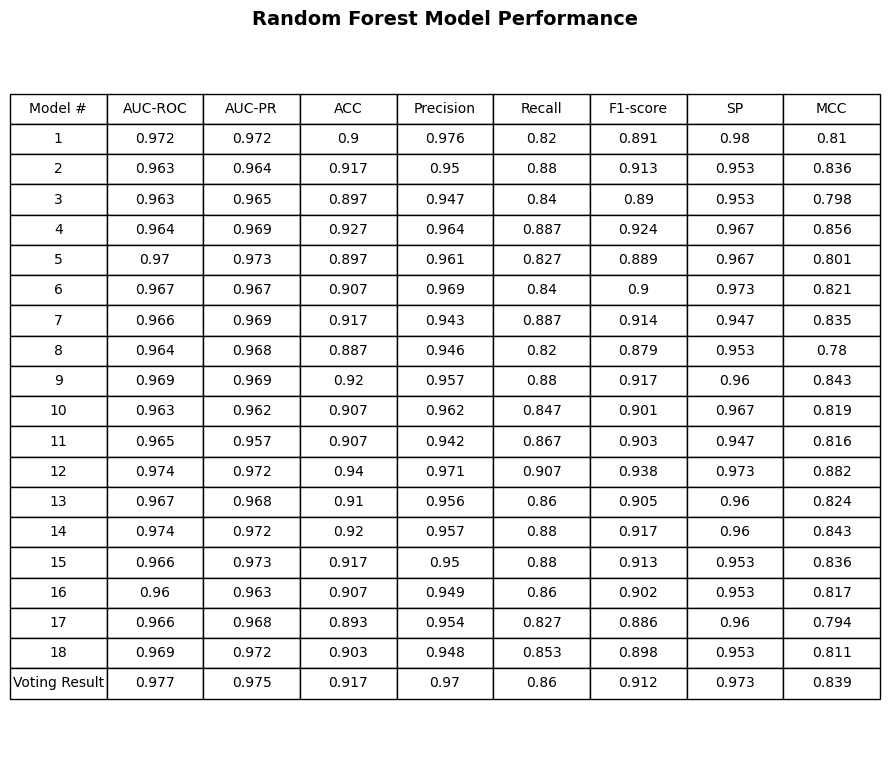

In [12]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(9, len(results_df)*0.41))


ax.axis('off')
table = ax.table(cellText=results_df.values,
                 colLabels=results_df.columns,
                 cellLoc='center',
                 loc='center')


table.scale(1, 1.5) 
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.title("Random Forest Model Performance", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


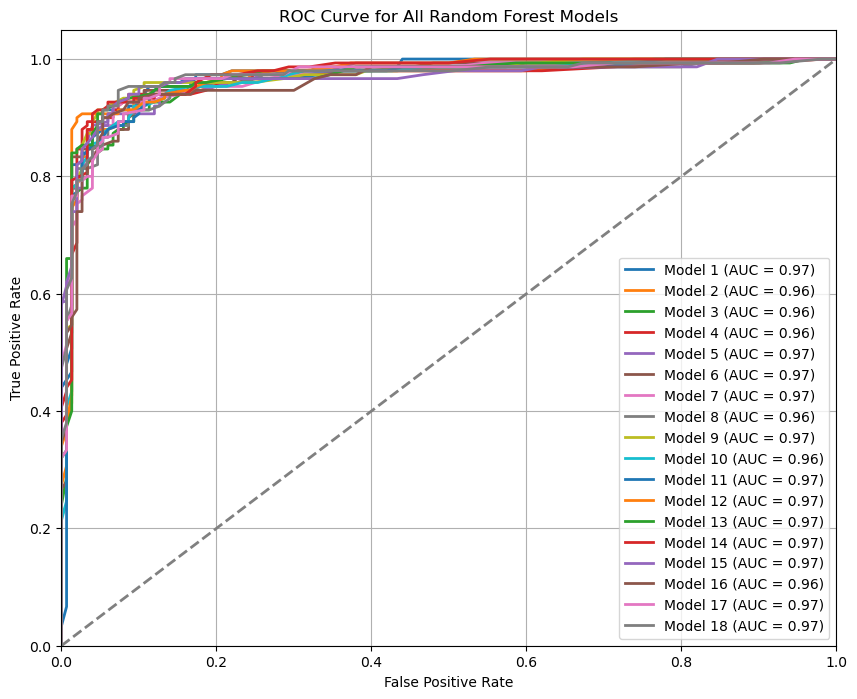

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for i, model in enumerate(rf_models):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Model {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Random Forest Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
